In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

Lambda_idx = 0
nbins = 100
# Lambda_idx = int(sys.argv[1])
# nbins = int(sys.argv[2])

Lambda = Lambdas[Lambda_idx]

# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)


oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_idx_0_from_quad_nbins_100.npy


In [2]:
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), nbins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi = np.mean(np.diff(chi_bin_edges))



In [4]:
from scipy.interpolate import LinearNDInterpolator


In [5]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)


In [16]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [21]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [22]:
unfiltered_auto = np.zeros((100, nbins, nbins))
for i in trange(nbins):
    for j in range(nbins):
        unfiltered_auto[:, i, j] = f_unfiltered_auto(chi_bin_centers[i], chi_bin_centers[j])

100%|██████████| 100/100 [00:02<00:00, 33.42it/s]


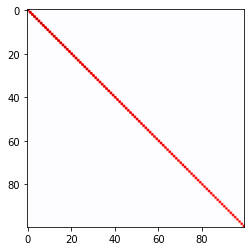

In [23]:
oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
cov = Pei * np.load(oup_fname)
vb = np.max(np.abs(cov))
plt.imshow(cov, vmin = -vb, vmax = vb, cmap='seismic')

1.2778615607637792e-05 2.139459786687462e-05


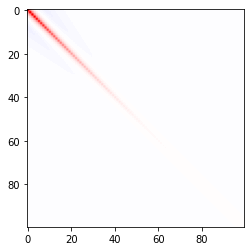

1.2787656741466292e-05 2.139459786687462e-05


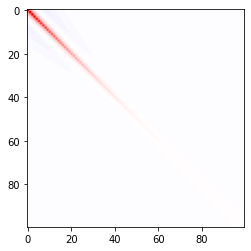

1.2797381449396507e-05 2.139459786687462e-05


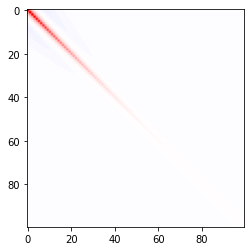

1.2807818530287937e-05 2.139459786687462e-05


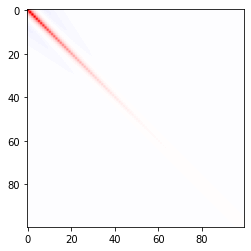

1.2818993440664769e-05 2.139459786687462e-05


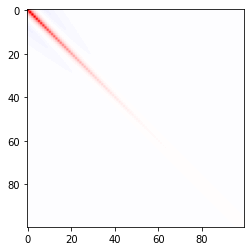

1.2830927020827464e-05 2.139459786687462e-05


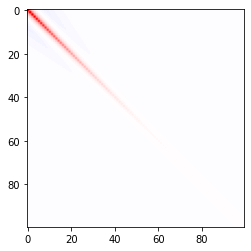

1.2843633915043056e-05 2.139459786687462e-05


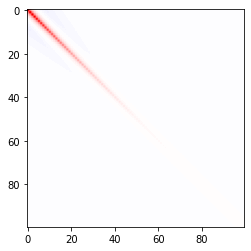

1.28571211761697e-05 2.139459786687462e-05


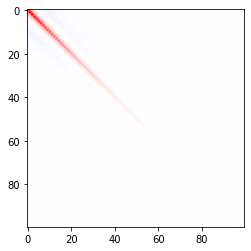

1.28713865650961e-05 2.139459786687462e-05


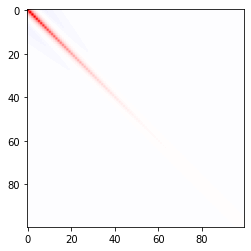

1.2886416422414905e-05 2.139459786687462e-05


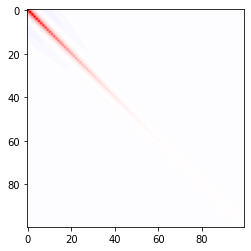

1.290218313299357e-05 2.139459786687462e-05


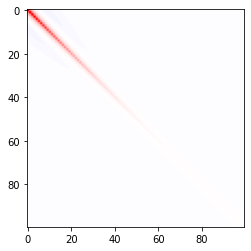

1.2918641929987506e-05 2.139459786687462e-05


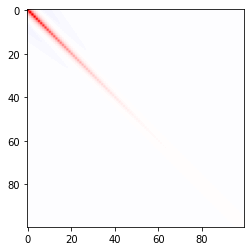

1.2935728214118794e-05 2.139459786687462e-05


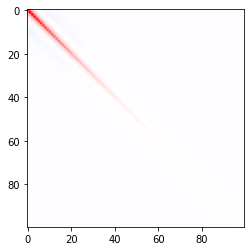

1.2953354076593315e-05 2.139459786687462e-05


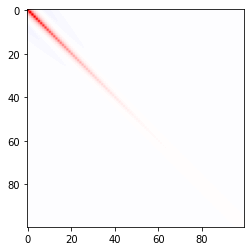

1.2971404347939564e-05 2.139459786687462e-05


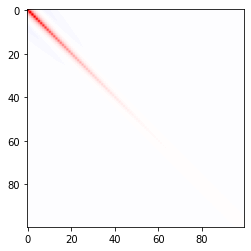

1.2989732431053794e-05 2.139459786687462e-05


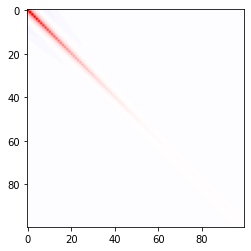

1.30081555533005e-05 2.139459786687462e-05


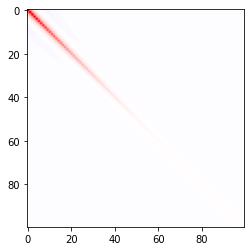

1.3026449765519215e-05 2.139459786687462e-05


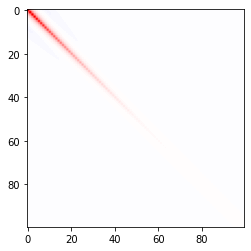

1.3044344696562091e-05 2.139459786687462e-05


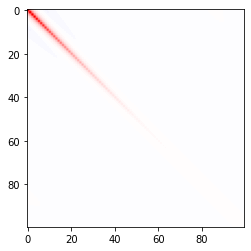

1.3061517756306154e-05 2.139459786687462e-05


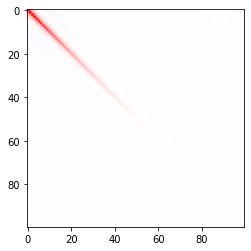

1.3077588244831052e-05 2.139459786687462e-05


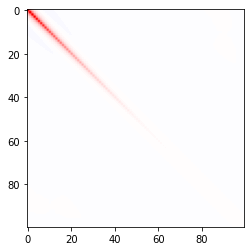

1.3092111681568295e-05 2.139459786687462e-05


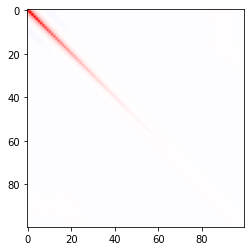

1.3104573597893492e-05 2.139459786687462e-05


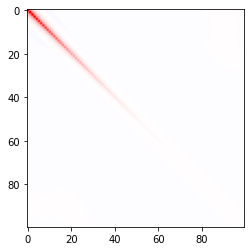

1.3114384186824596e-05 2.139459786687462e-05


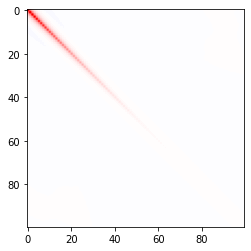

1.312087345071833e-05 2.139459786687462e-05


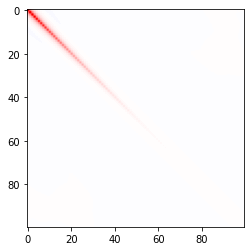

1.3123287326260438e-05 2.139459786687462e-05


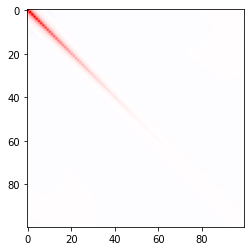

1.3120785316717995e-05 2.139459786687462e-05


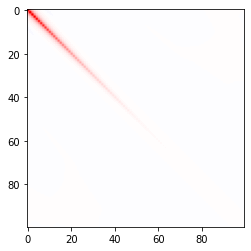

1.3112440656827187e-05 2.139459786687462e-05


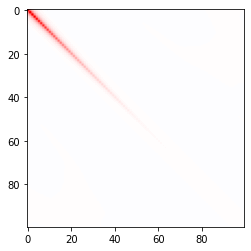

1.3097243149507102e-05 2.139459786687462e-05


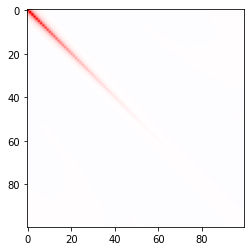

1.3074106307692006e-05 2.139459786687462e-05


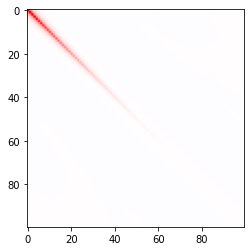

1.3041878852022265e-05 2.139459786687462e-05


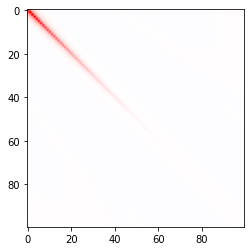

1.2999363647740388e-05 2.139459786687462e-05


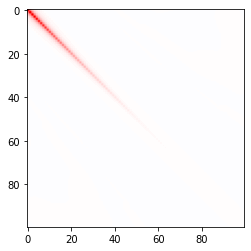

1.2945342899095627e-05 2.139459786687462e-05


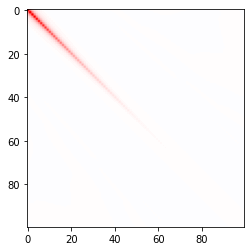

1.2878612440399865e-05 2.139459786687462e-05


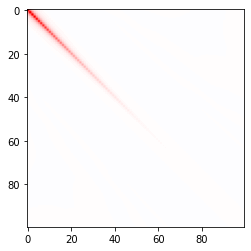

1.2798025948399237e-05 2.139459786687462e-05


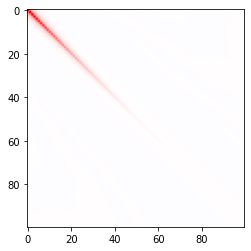

1.2702548628699894e-05 2.139459786687462e-05


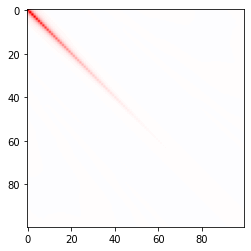

1.2591321512443463e-05 2.139459786687462e-05


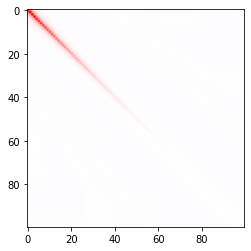

1.2463732874734247e-05 2.139459786687462e-05


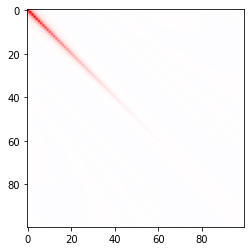

1.2319496953282531e-05 2.139459786687462e-05


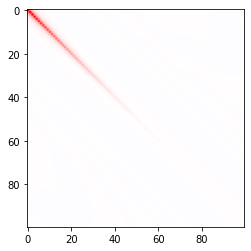

1.2158731253700207e-05 2.139459786687462e-05


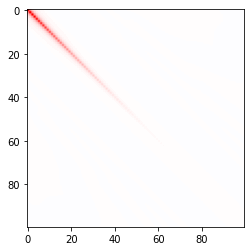

1.1982028042639427e-05 2.139459786687462e-05


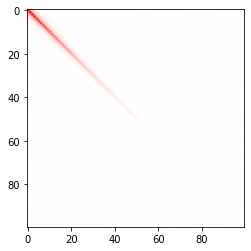

1.179050668381569e-05 2.139459786687462e-05


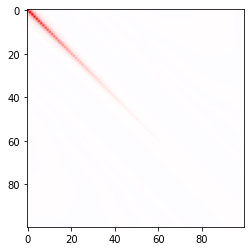

1.1585834402204222e-05 2.139459786687462e-05


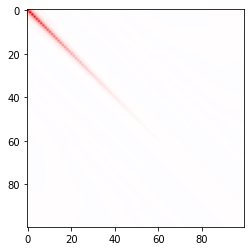

1.1370197230618649e-05 2.139459786687462e-05


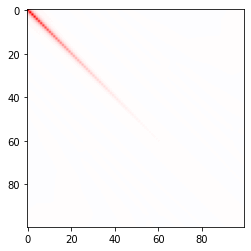

1.1146199339334969e-05 2.139459786687462e-05


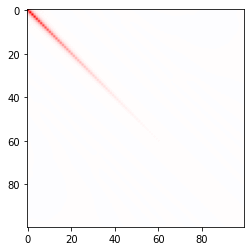

1.0916654900355056e-05 2.139459786687462e-05


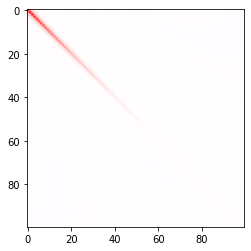

1.06841060754178e-05 2.139459786687462e-05


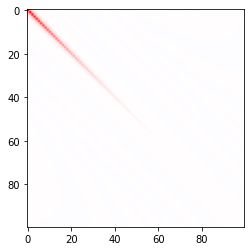

1.0451806505051696e-05 2.139459786687462e-05


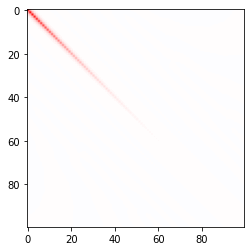

1.0222219366558474e-05 2.139459786687462e-05


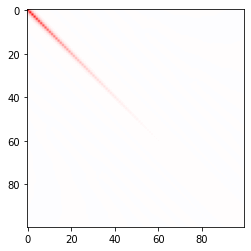

9.996013265496527e-06 2.139459786687462e-05


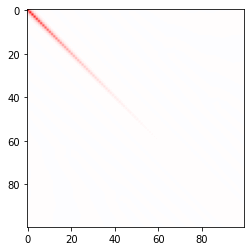

9.77199299931809e-06 2.139459786687462e-05


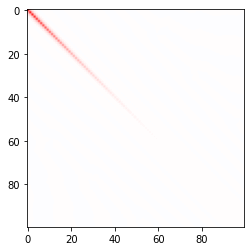

9.54724995079191e-06 2.139459786687462e-05


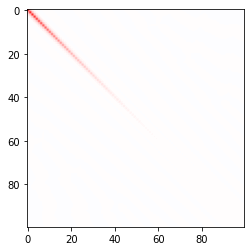

9.317741859123315e-06 2.139459786687462e-05


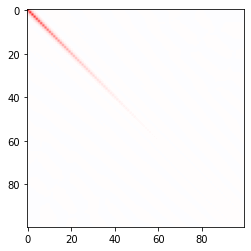

9.079367242398666e-06 2.139459786687462e-05


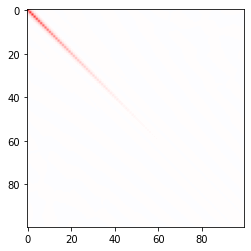

8.822987547521504e-06 2.139459786687462e-05


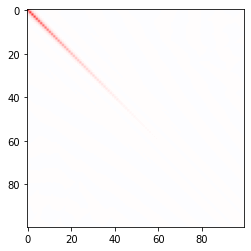

8.542403121744201e-06 2.139459786687462e-05


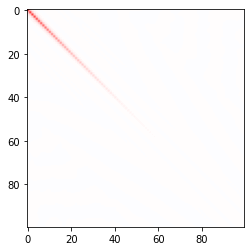

8.234672666408068e-06 2.139459786687462e-05


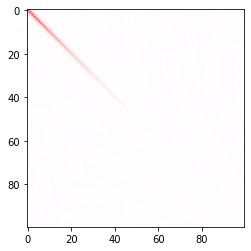

7.901800262098133e-06 2.139459786687462e-05


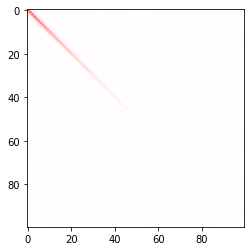

7.552657146078617e-06 2.139459786687462e-05


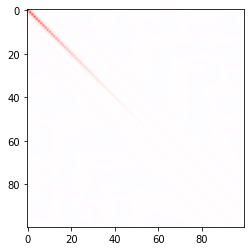

7.201580252069806e-06 2.139459786687462e-05


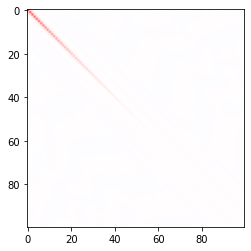

6.864814911950657e-06 2.139459786687462e-05


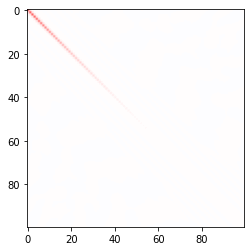

6.556195854225073e-06 2.139459786687462e-05


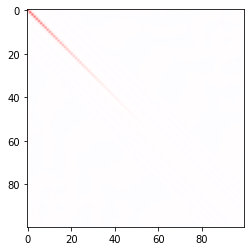

6.281620954740846e-06 2.139459786687462e-05


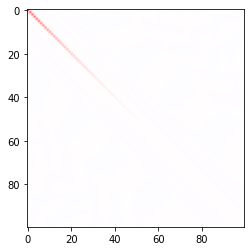

6.034189667003755e-06 2.139459786687462e-05


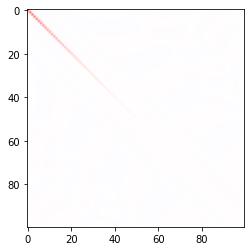

5.7954813967983045e-06 2.139459786687462e-05


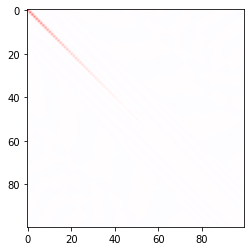

5.542668687869704e-06 2.139459786687462e-05


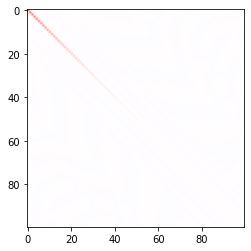

5.260031924423497e-06 2.139459786687462e-05


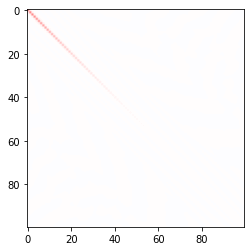

4.955273650530355e-06 2.139459786687462e-05


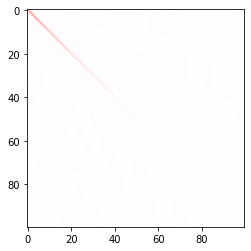

4.657429466212207e-06 2.139459786687462e-05


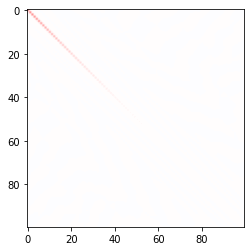

4.393551488970519e-06 2.139459786687462e-05


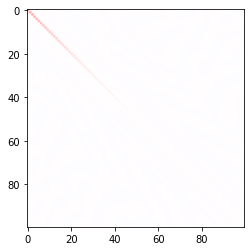

4.169824615009897e-06 2.139459786687462e-05


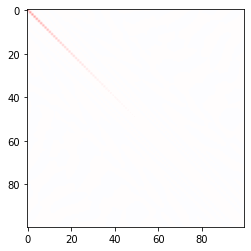

3.961687660251922e-06 2.139459786687462e-05


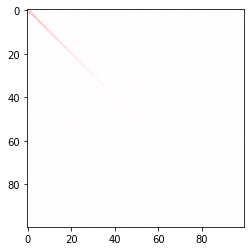

3.7389876811335117e-06 2.139459786687462e-05


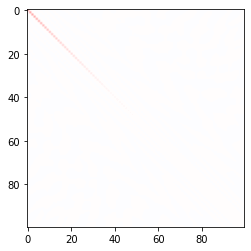

3.4988948625223503e-06 2.139459786687462e-05


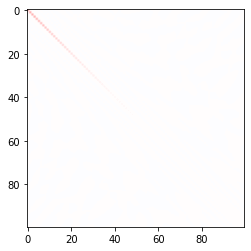

3.270504580712367e-06 2.139459786687462e-05


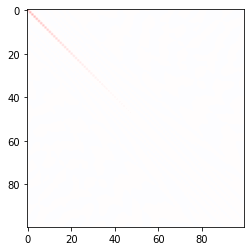

3.0748860038874726e-06 2.139459786687462e-05


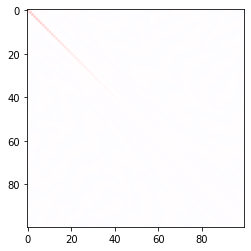

2.895282238232331e-06 2.139459786687462e-05


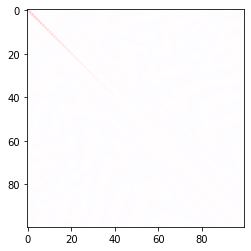

2.7076517026013958e-06 2.139459786687462e-05


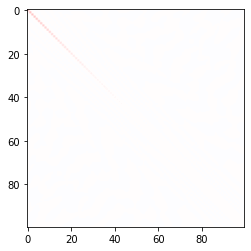

2.5218785584683515e-06 2.139459786687462e-05


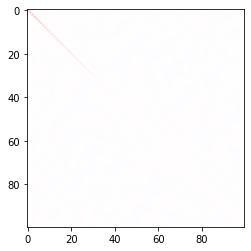

2.3573141640487522e-06 2.139459786687462e-05


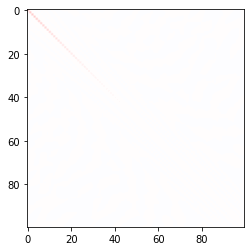

2.203349427152604e-06 2.139459786687462e-05


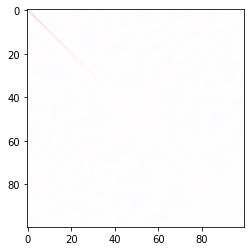

2.0491555327128734e-06 2.139459786687462e-05


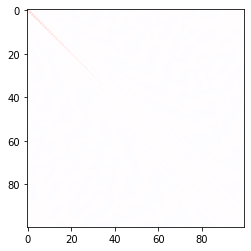

1.906486636126144e-06 2.139459786687462e-05


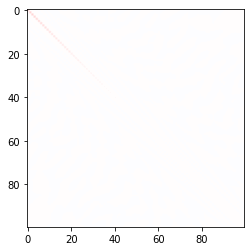

1.7743387441229896e-06 2.139459786687462e-05


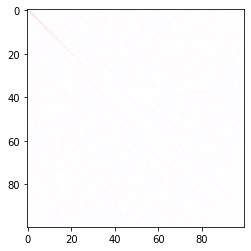

1.6463429120713664e-06 2.139459786687462e-05


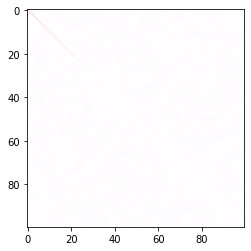

1.5278248687975736e-06 2.139459786687462e-05


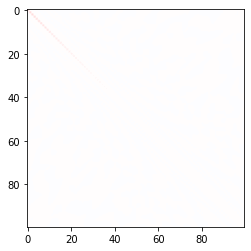

1.4160783768199995e-06 2.139459786687462e-05


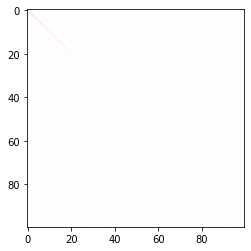

1.3110338224472803e-06 2.139459786687462e-05


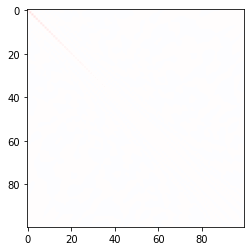

1.2129621745730124e-06 2.139459786687462e-05


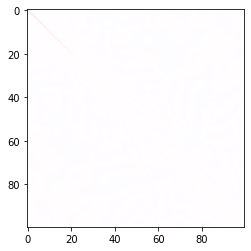

1.1209774715123572e-06 2.139459786687462e-05


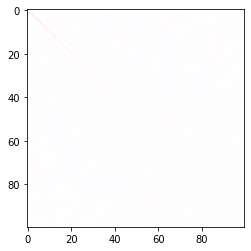

1.0351725032537357e-06 2.139459786687462e-05


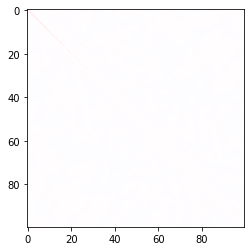

9.550707813803552e-07 2.139459786687462e-05


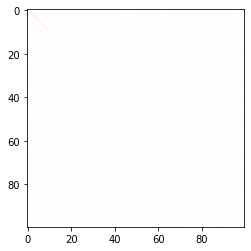

8.80453483731313e-07 2.139459786687462e-05


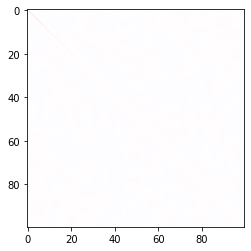

8.109525172096739e-07 2.139459786687462e-05


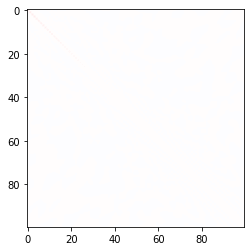

7.463346074278035e-07 2.139459786687462e-05


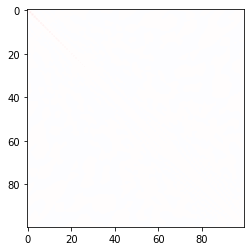

6.863471512342456e-07 2.139459786687462e-05


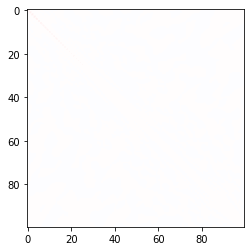

6.307175608805837e-07 2.139459786687462e-05


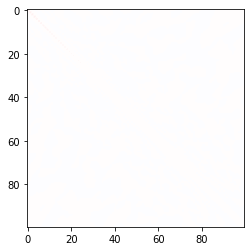

5.791736321313091e-07 2.139459786687462e-05


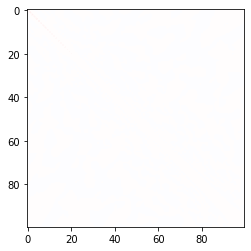

5.314577387276012e-07 2.139459786687462e-05


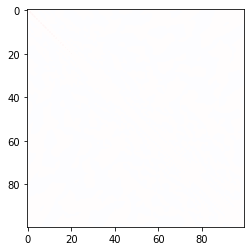

4.873277562868103e-07 2.139459786687462e-05


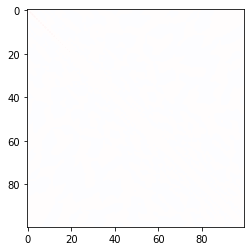

In [24]:
for ell_idx in range(len(ells)):
#     tmb_vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()

In [26]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_nbins_%d_zmin_%.1f_zmax_%.1f.npy'%(nbins, zmin, zmax), unfiltered_auto)